# 1. 데이터 전처리

##### 데이터 변환 - 표준 정규화

- 정규분포를 따르는 데이터 생성 : 한국인 1,000명이 연간 육류 소비량이 53.9kg, 표준편차 5kg의 정규분포를 따르고 일본인 성인 남성 1,000명의 육류소비량이 32.7kg, 표준편차 4kg의 정규분포를 따른다고 했을 때 두 집단의 육류소비량을 평균이 0, 표준편차가 1인 표준정규분포로 표준화 해보자.

In [2]:
# 1. random.randn() 함수를 사용하여 정규분포를 따르는 데이터 생성
# 파이썬 난수발생 함수 : numpy 패키지
# np.random.rand(n) : 0~1 사이의 균일한 분포를 갖는 난수 n개를 생성
# np.random.randint(min, max, size=n) : min ~ max 사이의 균일한 분포를 갖는 임의의 정수 n개 생성
# np.random.randn(n) : 평균 0, 표준편차 1의 표준정규분포를 갖는 난수 n개를 생성한다.
# 평균 m, 표준편차 s의 정규분포를 갖는 난수를 생성하기 위해서는 s * np.random.randn(n) + m 식 사용

In [8]:
# 2. 표준정규분포를 갖는 데이터를 생성하고 생성된 데이터를 파이썬 데이터프레임으로 변환한다.
import numpy as np
import pandas as pd

# 한국인 일본인 각 성인 1,000명의 육류소비량 데이터 생성
meat_consumption_Korean = 5*np.random.randn(1000) + 53.9
meat_consumption_Japan = 4*np.random.randn(1000) + 32.7

# 데이터 프레임 생성
meat_consumption = pd.DataFrame({'한국인':meat_consumption_Korean,'일본인':meat_consumption_Japan})

# 상위 6개 데이터 확인
meat_consumption.head(6)

,한국인,일본인
0,52.937202,29.971252
1,59.152365,34.325000
2,56.572919,29.024138
3,51.370432,30.264300
4,52.294202,36.942793
5,56.945579,32.051389


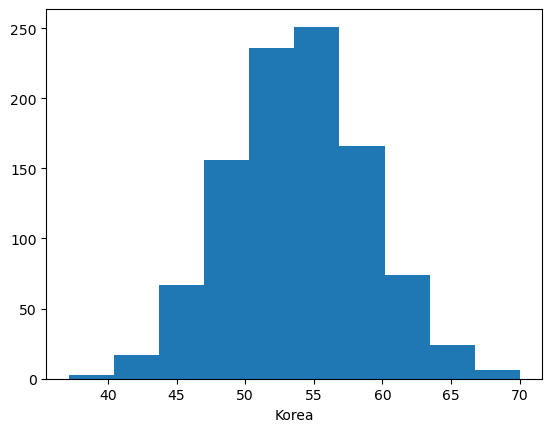

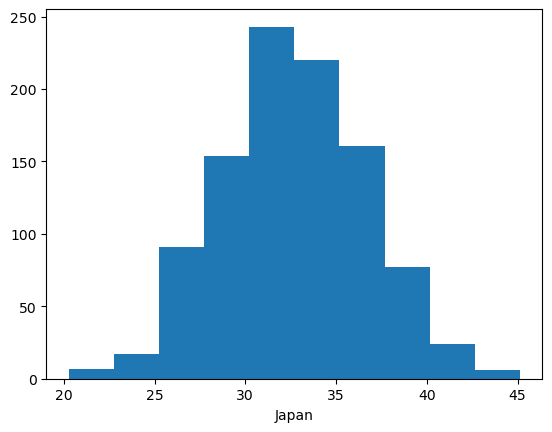

In [9]:
# 3. 시각화를 통해서 히스토그램에 의한 파악을 수행해본다.
# 히스토그램 함수 : hist()
# hist(x, bins = 10, range=[-10, 10], label='title')
# x = 히스토그램 대상, bins = 지정한 수의 칸으로 나눔, range = 표시할 값의 범위, label = 각 그래프의 범례

# 4. 한국인과 일본인의 육류소비량 분포를 알 수 있다.
import matplotlib.pyplot as plt

# 한국인 육류소비량 히스토그램
plt.hist(meat_consumption_Korean)
plt.xlabel('Korea')
plt.show()

# 일본인 육류소비량 히스토그램
plt.hist(meat_consumption_Japan)
plt.xlabel('Japan')
plt.show()

* ① Z-표준화

- z-score는 각 데이터 값에서 평균을 뺀 후 표준편차로 나누어 준 값(변환 후 평균은 0, 표준편차는 1)이다.
- z-표준화는 (x - np.mean(x)) / np.ste(x) 식으로 직접 계산할 수 있으며 scipy 패키지의 zscore() 함수를 사용하거나 sckit-learn 패키지의 preprocessing을 이용해서 구할 수도 있다.

In [42]:
import numpy as np
import pandas as pd
df1 = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/df_sample.csv')

mid_avg = np.mean(df1['중간'])
mid_std = np.std(df1['중간'])
df1['중간_z점수'] = (df1['중간'] - mid_avg) / mid_std

df1.head()

,학번,중간,기말,리포트,퀴즈,중간_z점수
0,S01,90,95,20,20,1.231167
1,S02,82,83,18,18,0.436866
2,S03,80,78,18,18,0.238290
3,S04,78,75,10,10,0.039715
4,S05,93,91,12,12,1.529030


##### ↓ 따라하기

In [12]:
# 1. 먼저 zscore() 함수를 사용해서 표준화 한다.

import scipy.stats as ss

meat_consumption['한국인_정규화'] = ss.zscore(meat_consumption_Korean)
meat_consumption['일본인_정규화'] = ss.zscore(meat_consumption_Japan)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화
0,52.937202,29.971252,-0.171393,-0.686307
1,59.152365,34.325000,1.060149,0.412929
2,56.572919,29.024138,0.549029,-0.925435
3,51.370432,30.264300,-0.481851,-0.612319
4,52.294202,36.942793,-0.298804,1.073871


In [13]:
# 2. (x-np.mean(x)) / np.std(x) 식을 입력하여 표준화 해보기

meat_consumption['한국인_정규화2'] = (meat_consumption_Korean - np.mean(meat_consumption_Korean)) / np.std(meat_consumption_Korean)
meat_consumption['일본인_정규화2'] = (meat_consumption_Japan - np.mean(meat_consumption_Japan)) / np.std(meat_consumption_Japan)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2
0,52.937202,29.971252,-0.171393,-0.686307,-0.171393,-0.686307
1,59.152365,34.325000,1.060149,0.412929,1.060149,0.412929
2,56.572919,29.024138,0.549029,-0.925435,0.549029,-0.925435
3,51.370432,30.264300,-0.481851,-0.612319,-0.481851,-0.612319
4,52.294202,36.942793,-0.298804,1.073871,-0.298804,1.073871


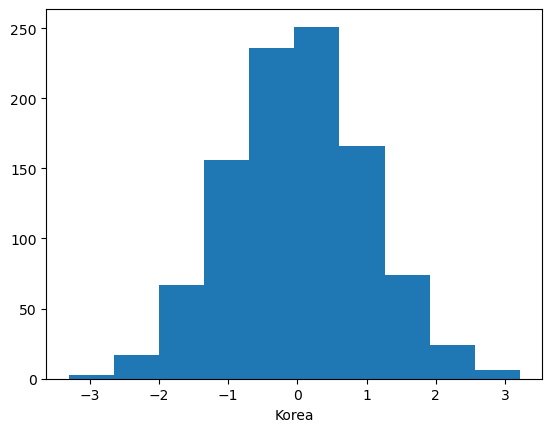

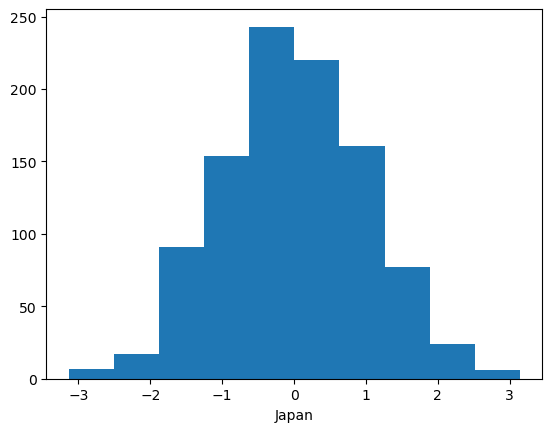

In [14]:
# 3. 표준화 된 데이터를 히스토그램을 통해 확인해보면 아래와 같다.
# 둘 다 평균이 0, 표준편차가 1인 표준정규분포로 표준화되었음을 확인할 수 있다.

plt.hist(meat_consumption['한국인_정규화'])
plt.xlabel('Korea')
plt.show()

plt.hist(meat_consumption['일본인_정규화'])
plt.xlabel('Japan')
plt.show()

In [16]:
# 5. 다음은 사이킷런 스테일러를 이용한 정규화 코드이다.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meat_consumption['한국인_정규화3'] = scaler.fit_transform(meat_consumption[['한국인']])

scaler = StandardScaler()
meat_consumption['일본인_정규화3'] = scaler.fit_transform(meat_consumption[['일본인']])

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2,한국인_정규화3,일본인_정규화3
0,52.937202,29.971252,-0.171393,-0.686307,-0.171393,-0.686307,-0.171393,-0.686307
1,59.152365,34.325000,1.060149,0.412929,1.060149,0.412929,1.060149,0.412929
2,56.572919,29.024138,0.549029,-0.925435,0.549029,-0.925435,0.549029,-0.925435
3,51.370432,30.264300,-0.481851,-0.612319,-0.481851,-0.612319,-0.481851,-0.612319
4,52.294202,36.942793,-0.298804,1.073871,-0.298804,1.073871,-0.298804,1.073871


* ② Min-Max 정규화

- 연속형 변수의 값을 0과1사이의 값으로 변환한다. 스케일이 다른 두 변수를 변환하면 상호간에 비교가 가능하다.
- 사이킷런 패키지의 MinMaxScaler(), minmax_scale() 함수를 이용하는 방법과 넘파이 패키지의 통계함수를 이용하여 (x - np.min(x)) / (np.max(x) - np.min(X)) 방법이 있다.

In [21]:
# df1[['기말']] vs df1['기말']
# DataFrame VS Series

fin_min = np.min(df1['기말'])
fin_max = np.max(df1['기말'])
df1['기말_정규화'] = (df1['기말'] - fin_min) / (fin_max - fin_min)

df1.head()

,학번,중간,기말,리포트,퀴즈,중간_z점수,기말_정규화
0,S01,90,95,20,20,1.231167,1.000000
1,S02,82,83,18,18,0.436866,0.600000
2,S03,80,78,18,18,0.238290,0.433333
3,S04,78,75,10,10,0.039715,0.333333
4,S05,93,91,12,12,1.529030,0.866667


##### ↓ 따라하기

In [18]:
# 1. 먼저, MinMaxScaler() 함수 사용해서 표준화한다.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
meat_consumption['한국인_mm'] = scaler.fit_transform(meat_consumption[['한국인']])

scaler = MinMaxScaler()
meat_consumption['일본인_mm'] = scaler.fit_transform(meat_consumption[['일본인']])

meat_consumption[['한국인', '일본인', '한국인_mm', '일본인_mm']].head()

,한국인,일본인,한국인_mm,일본인_mm
0,52.937202,29.971252,0.480426,0.390018
1,59.152365,34.325000,0.669533,0.565286
2,56.572919,29.024138,0.591049,0.351890
3,51.370432,30.264300,0.432755,0.401815
4,52.294202,36.942793,0.460862,0.670670


In [23]:
# 2. 넘파이의 통계 패키지 사용하여 직접 표준화

Min = np.min(meat_consumption_Korean)
Max = np.max(meat_consumption_Korean)
meat_consumption['한국인_mm2'] = (meat_consumption[['한국인']] - Min) / (Max - Min)

Min = np.min(meat_consumption_Japan)
Max = np.max(meat_consumption_Japan)
meat_consumption['일본인_mm2'] = (meat_consumption[['일본인']] - Min) / (Max - Min)

meat_consumption[['한국인_mm', '일본인_mm', '한국인_mm2', '일본인_mm2']].head()

,한국인_mm,일본인_mm,한국인_mm2,일본인_mm2
0,0.480426,0.390018,0.480426,0.390018
1,0.669533,0.565286,0.669533,0.565286
2,0.591049,0.351890,0.591049,0.351890
3,0.432755,0.401815,0.432755,0.401815
4,0.460862,0.670670,0.460862,0.670670


---

##### 정규분포 변환

- 왜도(skewness)는 분포의 대칭 척도이다. 값은 양수, 음수 또는 정의되지 않을 수 있다.
- 왜도가 0이 아닌 경우 분포가 한쪽으로 치우쳐 있으며, 이 분포에서는 중심 경향 측정값(평균, 중앙값, 최빈값)이 동일하지 않다.

In [24]:
# 데이터의 왜도 계산

# USJudgeRatings(미국변호사들이 고등법원판사를 평가한 데이터)
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/USJudgeRatings.csv')
df.head()

,Unnamed: 0,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
3,"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
4,"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


In [25]:
# 왜도 계산을 위한 scipy 패키지의 skew() 함수 사용
# CONT변수의 데이터는 변호사와 판사의 접촉수로 1.08 수준으로 Poistive Skew(양의 왜도)를 가지며, PHYS는 판사의 신체적 능력으로 -1.558수준으로 Negative Skew(음의 왜도)rkwlsek.

import scipy.stats as ss

print(ss.skew(df['CONT']))
print(ss.skew(df['PHYS']))

1.0859724796276253
-1.5582154642293153


- 왜도에 따른 변수 변환식

- 왜도 양수 : 제곱근 변환 - sqrt(x) / 로그 변환 - log(x) 또는 log10(x) / 역수 변환 1/x
- 왜도 음수 : 제곱근 변환 - sqrt(max(x+1) - x) / 로그 변환 log(max(x+1) - x) 또는 log10(max(x+1) - x) / 역수 변환 - 1/(max(x+1) - x)

In [26]:
# log() 변환

df['CONT1'] = np.log(df['CONT'])
df['PHYS1'] = np.log(np.max(df['PHYS'] + 1) - df['PHYS'])

# 왜도 계산
print(ss.skew(df['CONT1']))
print(ss.skew(df['PHYS1']))

0.6555571886692603
0.5824357748750443


In [27]:
# log10() 변환

df['CONT2'] = np.log10(df['CONT'])
df['PHYS2'] = np.log10(np.max(df['PHYS'] + 1) - df['PHYS'])

# 왜도 계산
print(ss.skew(df['CONT2']))
print(ss.skew(df['PHYS2']))

0.6555571886692441
0.582435774875044


---

##### 범주화(Categorization), 이산형화(Discretization)

- 연속형 변수를 범주형 변수로 변환하는 작업이다.
- 몇 개의 범주로 나눌지와 어떤 기준으로 나눌지 정하는 것이 중요하다.
- 주로 조건문, cut(), qcut() 등을 사용해서 범주화 한다.

73.5


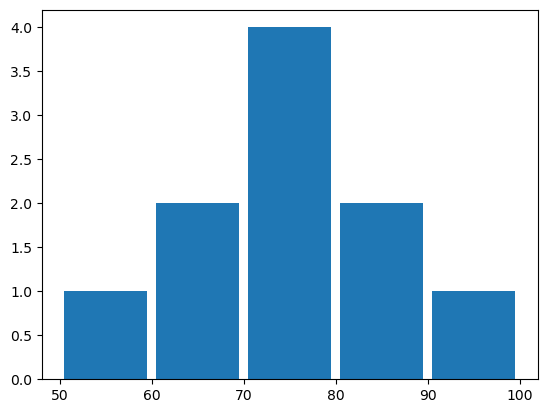

,이름,수학점수
0,철수,52
1,영희,92
2,미영,84
3,시완,71
4,미경,65
5,영환,81
6,숙경,66
7,부영,77
8,민섭,73
9,보연,74


In [28]:
# 임의로 데이터생성 예제 만들고 생성된 수학 점수를 데이터프레임으로 만든다.

data = [['철수', 52], ['영희', 92], ['미영', 84], ['시완', 71], ['미경', 65],
        ['영환', 81], ['숙경', 66], ['부영', 77], ['민섭', 73], ['보연', 74]]
df = pd.DataFrame(data, columns=['이름', '수학점수'])

print(np.mean(df['수학점수']))

# 히스토그램, 범위 50~100, 5개 구간
plt.hist(df['수학점수'], bins=5, range=[50, 100], rwidth=0.9)
# rwidth로 그래프 폭을 조절할 수 있다.(생략시 기본 값 1)
plt.show()
df

In [29]:
# 1. 조건을 사용해서 구간을 직접 지정

df['등급']= 0

df.loc[(df['수학점수']<60), '등급'] = 'F'
df.loc[(df['수학점수']>=60) & (df['수학점수']<70), '등급'] = 'D'
df.loc[(df['수학점수']>=70) & (df['수학점수']<80), '등급'] = 'C'
df.loc[(df['수학점수']>=80) & (df['수학점수']<90), '등급'] = 'B'
df.loc[(df['수학점수']>=90) & (df['수학점수']<100), '등급'] = 'A'

df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


In [30]:
# cut() 함수 사용
# pd.cut(x=데이터, bins=경계값리스트, labels=bin이름, include_lowest=True)

df['등급'] = pd.cut(x=df['수학점수'],
                  bins=[0, 60, 70, 80, 90, 100],
                  labels=['F', 'D', 'C', 'B', 'A'],
                  include_lowest=True)

df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


In [31]:
# pcut()사용
# cut() 함수는bins를 직접 수치로 지정하는 반면, qcut() 함수는 나누고자 하는 범주 개수를 정해주면 각 범주에 균등한 수의 데이터가 채워지도록 범주를 나눈다.

df['등급_qcut'] = pd.qcut(x=df['수학점수'], q=5, labels=['F', 'D', 'C', 'B', 'A'])

df

,이름,수학점수,등급,등급_qcut
0,철수,52,F,F
1,영희,92,A,A
2,미영,84,B,A
3,시완,71,C,D
4,미경,65,D,F
5,영환,81,B,B
6,숙경,66,D,D
7,부영,77,C,B
8,민섭,73,C,C
9,보연,74,C,C


---

##### 차원축소 : PCA(Principal Component Analysis, 주성분 분석)

- 주성분 분석이란 여러 변수들의 변량을 '주성분(principal component)'라고 불리는, 서로 상관성이 높은 여러 변수들의 선형조합으로 만든 새로운 변수들로 요약, 축소하는 기법이다.
- 첫번째 주성분으로 전체 변동을 가장 많이 설명할 수 있도록 하고, 두번째 주성분으로는 첫번째 주성분과는 상관성이 없어서(낮아서) 첫번째 주성분이 설명하지 못하는 나머지 변동을 정보의 손실없이 가장 많이 설명할 수 있도록 변수들의 선형조합으로 만들게 된다.

In [38]:
# 1. 데이터 준비

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/iris.csv')

df = iris.drop(['species'], axis=1)
df_species = iris['species']

df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
# 2. PCA 분석 수행
# 변수간의 스케일 차이가 나면 스케일이 큰 변수가 주성분에 영향을 주기 때문에 주성분 분석 전에 변수를 표준화나 정규화 시켜준다.
# 사이킷런의 PCA 이용해서 쉽게 주성분 분석 수행
# n_components 는 PCA로 변환할 차원의 수를 의미한다.
# 원본 데이터셋이(150, 4)의 배열로 변환됨을 알 수 있으며, pca.explained_variance_ratio_변수는 변환된 각각의 차원의 기여도를 보여준다.
# 첫 번쨰 PCA 변환요소(차원)만으로 전체 변동성의 73% 설명 가능하다. 두 번째 요소(차원)은 22.8%를 차지한다.
# 따라서 2개 요소로만 변환해도 원본 데이터의 변동성을 95.8% 설명가능하므로 변수를 원래 4개에서 2개로 줄일 수 있다.

from sklearn.preprocessing import StandardScaler

df['petal_length'] = StandardScaler().fit_transform(df[['petal_length']])
df['petal_width'] = StandardScaler().fit_transform(df[['petal_width']])
df['sepal_length'] = StandardScaler().fit_transform(df[['sepal_length']])
df['sepal_width'] = StandardScaler().fit_transform(df[['sepal_width']])

# PCA 수행
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
p_score = pca.fit_transform(df)
print(p_score.shape)
print(pca.explained_variance_ratio_)

(150, 4)
[0.72962445 0.22850762 0.03668922 0.00517871]


---

##### 결측치 처리

- 분석에서 이루어지는 결측에 대한 처리의 실무적 방법을 타이타닉 데이터셋을 이용하여 진행

In [43]:
# 1. 결측치 확인과 제거
x = [14, 15, 13, 14, None, None, 19, 11, 12, 18]
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/df_sample.csv')
df['토론'] = x
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      10 non-null     object 
 1   중간      10 non-null     int64  
 2   기말      10 non-null     int64  
 3   리포트     10 non-null     int64  
 4   퀴즈      10 non-null     int64  
 5   토론      8 non-null      float64
dtypes: float64(1), int64(4), object(1)
memory usage: 612.0+ bytes


In [54]:
# isnull() 함수 사용하여 타이타닉의 결측치 찾기

df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/titanic.csv')

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [55]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
# 결측치 대체

# 완전분석법 : 결측값이 있는 행 삭제 / 평균대치법 : 결측값은 평균으로 대치 / 단순확률 대치법 : 확률 분포를 이용한 추정 값으로 대치 또는 주변값으로 대치

In [58]:
# 1. 결측치가 있는 행 전체를 데이터 셋에서 제거 dropna()

# 결측치가 있는 모든 행 삭제 : df.dropna(axis=0)
# 결측치가 있는 모든 열 삭제 : df.dropna(axis=1)
# Age열의 결측치가 있는 모든 행 삭제 : df.dropna(subset=['Age'], axis=0)

df_1 = df.dropna(axis=0)

print(df_1.isnull().sum().sum())
df_1.shape

0


(183, 12)

In [59]:
# 2. 결측치를 지정값으로 대체 filln()
# Age 변수 내 결측값을 평균값으로 대체

print(df['Age'].isnull().sum())
age_mean = df['Age'].mean()
df['Age'].fillna(age_mean, inplace=True)
print(df['Age'].isnull().sum())


# Embarked 변수 내 결측값을 가장 많이 출현한 값으로 대체

from scipy.stats import mode

print(df['Embarked'].isnull().sum())
embarked_mode = df['Embarked'].mode()  # Embarked 컬럼의 최빈값

df['Embarked'].fillna(embarked_mode[0], inplace=True)
print(df['Embarked'].isnull().sum())

177
0
2
0


In [60]:
# 3. 결측치를 인접한 값으로 대체
# fillna()함수에 method='ffill'옵션을 추가하면 결측치가 있는 행의 직전 행에 있는 값으로 대체한다.
# method='bfill' 옵션을 추가하면 결측치가 있는 행의 바로 다음 행에 있는 값으로 대체한다.

df['Embarked'].fillna(method='ffill', inplace=True)

In [65]:
# 4. 결측치를 그룹별 평균 값으로 대체 groupby()
# Sex별로 평균을 구했을 때에는 차이가 크지 않은 반면, Pclass별 Age 평균을 구해보면 차이가 많음을 알 수 있다.

df =pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/titanic.csv')

print(df.groupby("Sex")['Age'].mean())
print(df.groupby("Pclass")['Age'].mean())

# Pclass 별 Age 평균으로 결측치 대체
df['Age'].fillna(df.groupby("Pclass")['Age'].transform('mean'), inplace=True)

df.tail()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00000,0,0,370376,7.75,NaN,Q


---

##### 이상치(Outlier) 처리

- 이상값은 데이터의 범위에서 크게 벗어난 값이다.
- 사분위수범위, 정규분포를 이용해서 식별하고, 식별된 이상값은 제거 여부를 판단한다.

(array([ 1.,  1.,  0.,  4.,  1., 15., 20., 22., 36., 45., 28., 15., 12.,
         0.,  2.,  0.,  0.,  0.,  1.,  1.]),
 array([  2. ,   7.4,  12.8,  18.2,  23.6,  29. ,  34.4,  39.8,  45.2,
         50.6,  56. ,  61.4,  66.8,  72.2,  77.6,  83. ,  88.4,  93.8,
         99.2, 104.6, 110. ]),
 <BarContainer object of 20 artists>)

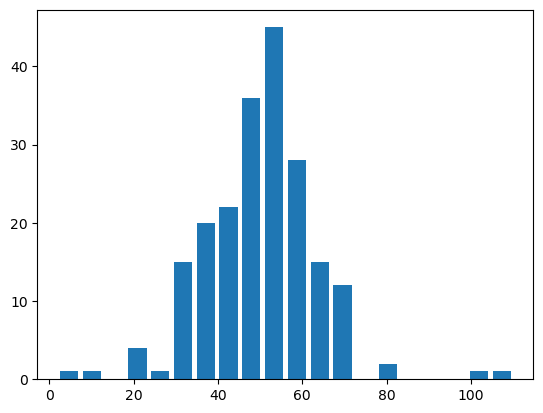

In [67]:
# 1. 데이터 준비
# 이상치가 포함된 데이터 만들어보기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = 10 * np.random.randn(200) + 50  # 평균 50, 표준편차 10을 가지는 데이터 200개 생성 -> 데이터프레임으로 변환
df = pd.DataFrame({'값':data})

# 임의의 이상치 삽입
df.loc[201] = 2
df.loc[202] = 100
df.loc[203] = 10
df.loc[204] = 110

# 분포 시각화
plt.hist(df['값'], bins=20, rwidth=0.8)

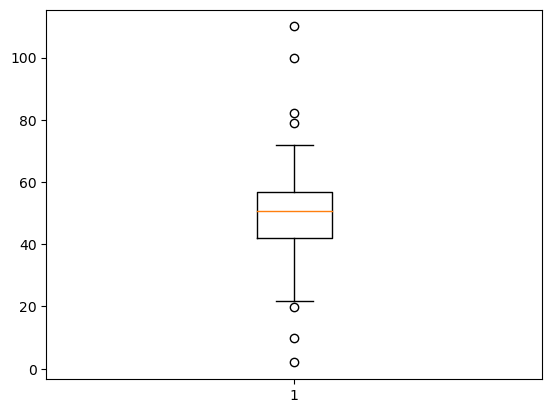

In [68]:
# 2. IQR(Interquartile Range, 사분위범위) 방법
# 75% 지점인 3사분위수 - 25% 지점인 1사분위수 값의 차이를 IQR이라한다.
# boxplot을 그렸을 때, 점으로 나오는 샘플들이 이상치다.

# 박스플롯
plt.boxplot(df['값'])
plt.show()

In [69]:
# 사분위범위는 quantile()함수나 describe() 함수 이용해서 구할 수 있다.

# quantile() 함수는 수치 데이터를 크기 순서로 정렬했을 때 0~100% 위치에 해당하는 숫자를 변환

Q1 = df['값'].quantile(.25)
Q2 = df['값'].quantile(.5)
Q3 = df['값'].quantile(.75)
IQR = Q3 - Q1

print(f"Q1 = {Q1}")
print(f"Q2 = {Q2}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")

Q1 = 42.13299839106538
Q2 = 50.70307083891478
Q3 = 56.7769988502664
IQR = 14.644000459201024


In [70]:
# describe() 함수는 데이터의 기초 통계량을 보여주며 이를 이용하여 구할 수 있다.

Q1 = df['값'].describe()['25%']
Q2 = df['값'].describe()['50%']
Q3 = df['값'].describe()['75%']
IQR = Q3 - Q1

print(f"Q1 = {Q1}")
print(f"Q2 = {Q2}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")

Q1 = 42.13299839106538
Q2 = 50.70307083891478
Q3 = 56.7769988502664
IQR = 14.644000459201024


In [71]:
# 3. IQR 값 구하기

# 이상치는 (3사분위수 + IQR*1.5) 보다 큰 값이거나 (1사분위수 - IQR*1.5) 보다 작은 값으로 검출

condition = df['값'] > (Q3 + IQR*1.5)
upperOutlier = df[condition]
condition = df['값'] < (Q1 - IQR*1.5)
lowerOutlier = df[condition]

print(upperOutlier)
print(lowerOutlier)

              값
77    79.032789
194   82.064703
202  100.000000
204  110.000000
             값
65   19.905222
201   2.000000
203  10.000000


##### 평활화 (Smoothing)

- 평활화는 데이터 분포를 매끄럽게 함으로써 데이터에서 중요하지 않은 것을 제거하고 그 패턴을 알아내는 방법이다.
- 평활화의 목적은 값의 변화를 매끄럽게 하여 데이터의 추세를 알기 쉽게 하는 것이다.
- 평활화는 필터링을 사용하여 수행한다.

In [72]:
# 1. 데이터 준비

df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/lynx.csv')

print(df.head(10))
print(df.describe())

   Unnamed: 0  time  value
0           1  1821    269
1           2  1822    321
2           3  1823    585
3           4  1824    871
4           5  1825   1475
5           6  1826   2821
6           7  1827   3928
7           8  1828   5943
8           9  1829   4950
9          10  1830   2577
       Unnamed: 0         time        value
count  114.000000   114.000000   114.000000
mean    57.500000  1877.500000  1538.017544
std     33.052988    33.052988  1585.843914
min      1.000000  1821.000000    39.000000
25%     29.250000  1849.250000   348.250000
50%     57.500000  1877.500000   771.000000
75%     85.750000  1905.750000  2566.750000
max    114.000000  1934.000000  6991.000000


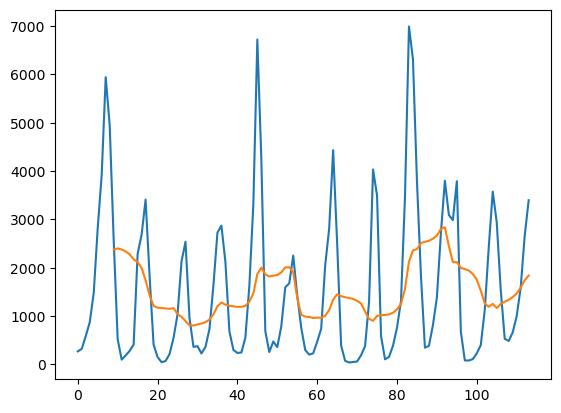

In [75]:
# 2. 단순이동평균(Simple Moving Average) : rolling(n).mean(), n= 데이터 개수

# 10년 단순이동평균
df['sma'] = df['value'].rolling(10).mean()

plt.plot(df['value'])
plt.plot(df['sma'])
plt.show()

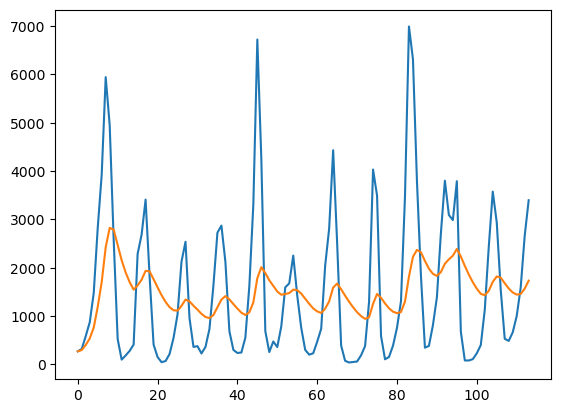

In [76]:
# 3. 지수가중이동평균(Exponentially-weighted Moving Average) : ewm(n).mean()
# 최근 데이터에 가중치를 부여하여 이동평균을 구하는데,가중치를 지수함수형태로 사용한다.

# 10년 지수가중이동평균
df['ewm'] = df['value'].ewm(10).mean()

plt.plot(df['value'])
plt.plot(df['ewm'])
plt.show()